In [2]:
import skfuzzy as skf
import numpy as np
from matplotlib import pyplot as plt

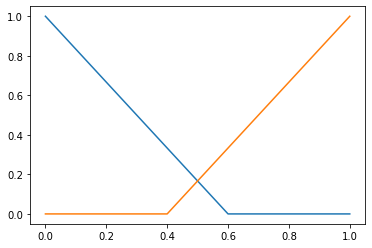

In [3]:
is_anemia = np.arange(0, 1.1, 0.1)

def trapezoid(array, a, b, c, d):
    res = np.zeros_like(array)
    div1 = b - a
    div2 = c - d
    for i, x in enumerate(array):
        if x <= a or x >= d:
            res[i] = 0
        elif b <= x <= c:
            res[i] = 1.
        elif a < x < b:
            res[i] = (x - a)/div1
        elif c < x < d:
            res[i] = (x - d)/div2

    return res

yes = trapezoid(is_anemia, -1, 0, 0, 0.6)
no = trapezoid(is_anemia, 0.4, 1, 1, 2)


plt.plot(is_anemia,yes)
plt.plot(is_anemia, no)

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


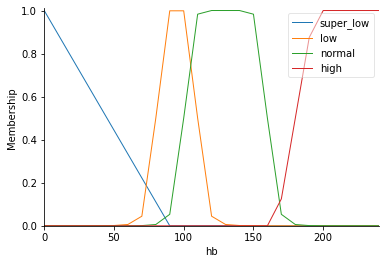

In [4]:
from skfuzzy import control as ctrl

hb = ctrl.Antecedent(np.arange(0, 250, 10.), "hb")
eretrocit = ctrl.Antecedent(np.arange(0, 10, 0.1), "eretrocit")
ferrum = ctrl.Antecedent(np.arange(0, 45, 1.), "ferrum")
billirubin = ctrl.Antecedent(np.arange(0, 30, 0.5), "billirubin")
leicocit= ctrl.Antecedent(np.arange(0, 15, 0.5), "leicocit")

hb['super_low'] = trapezoid(hb.universe, -1, 0, 0, 90)
hb["low"] = skf.gbellmf(hb.universe, 15,3, 95)
hb["normal"] = skf.gbellmf(hb.universe, 30, 5, 130)
hb["high"] = skf.smf(hb.universe, 160, 200)

hb.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


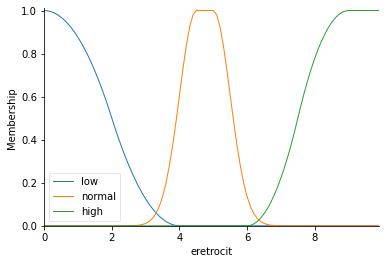

In [5]:
eretrocit['low'] = skf.zmf(eretrocit.universe, 0, 4)
eretrocit['normal'] = skf.gauss2mf(eretrocit.universe, 4.5, 0.5, 5, 0.5)
eretrocit['high'] = skf.smf(eretrocit.universe, 6, 9)

eretrocit.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


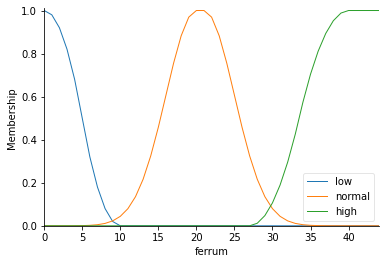

In [6]:
ferrum['low'] = skf.zmf(ferrum.universe, 0, 10)
ferrum['normal'] = skf.gauss2mf(ferrum.universe, 20, 4, 21, 4)
ferrum['high'] = skf.smf(ferrum.universe, 27, 40)

ferrum.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


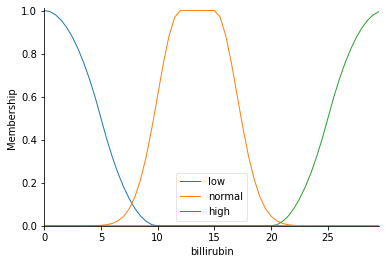

In [7]:
billirubin['low'] = skf.zmf(billirubin.universe, 0, 10)
billirubin['normal'] = skf.gauss2mf(billirubin.universe, 12, 2, 15, 2)
billirubin['high'] = skf.smf(billirubin.universe, 20, 30)

billirubin.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


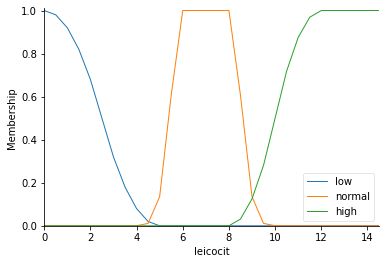

In [8]:
leicocit['low'] = skf.zmf(leicocit.universe, 0, 5)
leicocit['normal'] = skf.gauss2mf(leicocit.universe, 6, 0.5, 8, 0.5)
leicocit["high"] = skf.smf(leicocit.universe, 8, 12)

leicocit.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


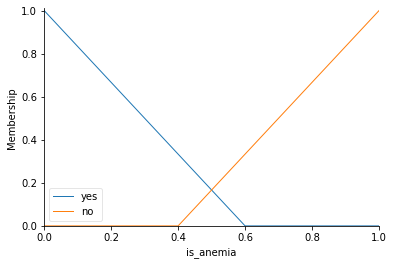

In [9]:
is_anemia = ctrl.Consequent(np.arange(0, 1.1, 0.1), "is_anemia")

is_anemia['yes'] = trapezoid(is_anemia.universe, -1, 0, 0, 0.6)
is_anemia['no'] = trapezoid(is_anemia.universe, 0.4, 1, 1, 2)

is_anemia.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


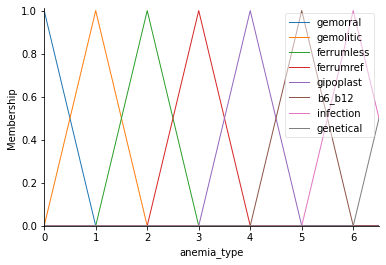

In [10]:
anemia_type = ctrl.Consequent(np.arange(0, 7, 0.5), "anemia_type")

anemia_type['gemorral'] = trapezoid(anemia_type.universe, -1, 0, 0, 1)
anemia_type['gemolitic'] = trapezoid(anemia_type.universe, 0, 1, 1, 2)
anemia_type['ferrumless'] = trapezoid(anemia_type.universe, 1, 2, 2, 3)
anemia_type['ferrumref'] = trapezoid(anemia_type.universe, 2, 3, 3, 4)
anemia_type['gipoplast'] = trapezoid(anemia_type.universe, 3, 4, 4, 5)
anemia_type['b6_b12'] = trapezoid(anemia_type.universe, 4, 5, 5, 6)
anemia_type['infection'] = trapezoid(anemia_type.universe, 5, 6, 6, 7)
anemia_type['genetical'] = trapezoid(anemia_type.universe, 6, 7, 7, 8)

anemia_type.view()

C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


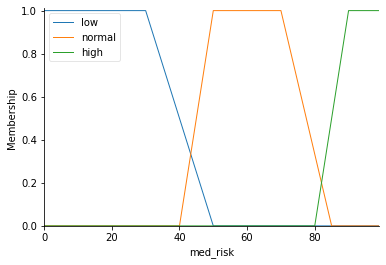

In [11]:
med_risk = ctrl.Consequent(np.arange(0, 100, 1.), "med_risk")

med_risk['low'] = trapezoid(med_risk.universe, -1, 0, 30, 50)
med_risk["normal"] = trapezoid(med_risk.universe, 40, 50, 70, 85)
med_risk["high"] = trapezoid(med_risk.universe, 80, 90, 100, 110)

med_risk.view()

In [17]:
rule1 = ctrl.Rule(hb['super_low'] | eretrocit['low'] | leicocit['low'], [is_anemia['yes'], anemia_type['gemorral']])
rule2 = ctrl.Rule(hb["low"] | eretrocit['low'] | leicocit['low'], [is_anemia['yes'] , anemia_type['gemorral']])
rule3 = ctrl.Rule(hb['low'] | eretrocit['low'] | billirubin['high'], [is_anemia['yes'], anemia_type['gemolitic']])
rule4 = ctrl.Rule(hb['super_low'] | eretrocit['low'] | billirubin['high'], [is_anemia['yes'], anemia_type['gemolitic']])
rule5 = ctrl.Rule(hb['low'] | eretrocit['low'] | ferrum['low'], [is_anemia['yes'], anemia_type['ferrumless']])
rule6 = ctrl.Rule(hb['super_low'] | eretrocit['low'] | ferrum['low'], [is_anemia['yes'], anemia_type['ferrumless']])
rule7 = ctrl.Rule(hb['super_low'] | eretrocit['low'] | ferrum['high'], [is_anemia['yes'], anemia_type['ferrumref']])
rule8 = ctrl.Rule(hb['low'] | eretrocit['low'] | ferrum['high'], [is_anemia['yes'], anemia_type['ferrumless']])
rule9 = ctrl.Rule(hb["low"] | eretrocit['low'] | ferrum['high'] | billirubin['high'] | leicocit['low'], [is_anemia['yes'], anemia_type['gipoplast']])
rule10 = ctrl.Rule(hb['super_low'] | eretrocit['low'] | leicocit['low'] |  ferrum['high'] | billirubin['high'], [is_anemia['yes'], anemia_type['gipoplast']])
rule11 = ctrl.Rule(hb["normal"] | eretrocit['normal'] | leicocit['low'], [is_anemia['yes'], anemia_type['b6_b12']])
rule12 = ctrl.Rule(hb['super_low'] | leicocit["high"], [is_anemia['yes'], anemia_type['infection']])
rule13 = ctrl.Rule(hb['low'] | leicocit["high"], [is_anemia['yes'], anemia_type['infection']])
rule14 = ctrl.Rule(hb["low"] | eretrocit['low'] | ferrum['high'] | billirubin['high'] | leicocit['normal'], [is_anemia['yes'], anemia_type['genetical']])
rule15 = ctrl.Rule(hb["super_low"] | eretrocit['low'] | ferrum['high'] | billirubin['high'] | leicocit['normal'], [is_anemia['yes'], anemia_type['genetical']])
rule16 = ctrl.Rule(hb["high"] | eretrocit['high'], is_anemia['no'])
rule17 = ctrl.Rule(hb["normal"] | eretrocit['normal'] | leicocit['normal'], is_anemia['no'])
rule18 = ctrl.Rule(is_anemia['no'], med_risk['low'])
rule19 = ctrl.Rule(is_anemia['yes'] | hb['super_low'] | anemia_type['gemorral'], med_risk["high"] )
rule20 = ctrl.Rule(is_anemia['yes'] | hb['super_low'] | anemia_type['gemolitic'], med_risk["high"])
rule21 = ctrl.Rule(is_anemia['yes'] | anemia_type['ferrumless'], med_risk["high"])
rule22 = ctrl.Rule(is_anemia['yes'] | hb['super_low'] | anemia_type['infection'], med_risk["high"])
rule23 = ctrl.Rule(is_anemia['yes'] |  hb['low'] | anemia_type['gemorral'], med_risk["normal"])
rule24 = ctrl.Rule(is_anemia['yes'] | hb['low'] | anemia_type['gemolitic'], med_risk["normal"])
rule25 = ctrl.Rule(is_anemia['yes'] | anemia_type['ferrumless'], med_risk["normal"])
rule26 = ctrl.Rule(is_anemia['yes'] | anemia_type['gipoplast'], med_risk["normal"])
rule27 = ctrl.Rule(is_anemia['yes'] | hb['super_low'] | anemia_type['gipoplast'], med_risk["high"])
rule28 = ctrl.Rule(is_anemia['yes'] | anemia_type['b6_b12'], med_risk['low'])
rule29 = ctrl.Rule(is_anemia['yes'] | hb['super_low'] | anemia_type['genetical'], med_risk["normal"])
rule30 = ctrl.Rule(is_anemia['yes'] | hb['low'] | anemia_type['genetical'], med_risk['low'])
rule31 = ctrl.Rule(billirubin['low'], is_anemia['no'])

In [18]:
rules_base = [ rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
              rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19,
              rule20, rule21, rule22, rule23, rule24, rule25, rule26, rule27, rule28,
              rule29, rule30, rule31]

mark_ctrl = ctrl.ControlSystem(rules_base)

In [19]:
marking = ctrl.ControlSystemSimulation(mark_ctrl)

0.4999999999999999


C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


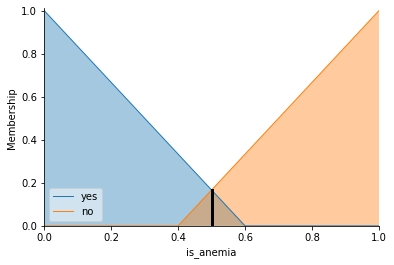

In [80]:
marking.input['hb'] = 0
marking.input['eretrocit'] = 0
marking.input['ferrum'] = 0
marking.input['billirubin'] = 0
marking.input['leicocit'] = 0
marking.compute()

print(marking.output['is_anemia'])
is_anemia.view(sim=marking)

3.247863247863248


C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


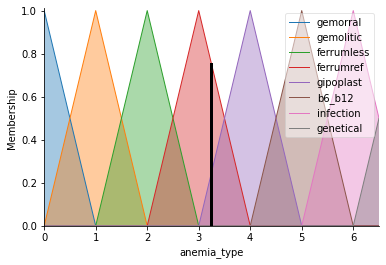

In [81]:
print(marking.output['anemia_type'])
anemia_type.view(sim=marking)

47.20588816439438


C:\Users\Lafavel\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


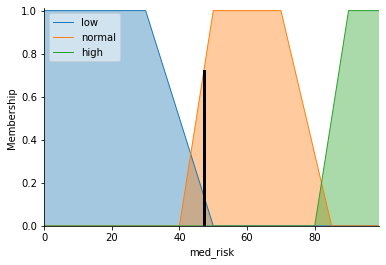

In [82]:
print(marking.output['med_risk'])
med_risk.view(sim=marking)